# Exploratory Data Analysis

The primary goal of this exploratory data analysis (EDA) is to uncover patterns and relationships within the anime ratings data. Specifically, we aim to:

1. Understand the distribution of ratings given by users and received by anime.
2. Investigate the impact of different factors such as genre, type, number of episodes, and member counts on anime ratings.
3. Examine the relationship between users’ rating behaviors (e.g., average ratings and rating counts).
4. Identify any significant correlations and trends that could provide deeper insights into the factors influencing anime ratings.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pingouin

### Loading Data <a id='loading_data'></a>

In [5]:
anime_df = pd.read_csv('data/anime_df.csv', index_col=1)
rating_df = pd.read_csv('data/rating_df.csv', index_col=0)

In [6]:
anime_df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
anime_df.head()

,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28977,Gintama°,TV,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9253,Steins;Gate,TV,24.0,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9969,Gintama&#039;,TV,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


### User-based rating distributions

In [12]:
rating_df['rating'].describe()

count    6.337240e+06
mean     7.808497e+00
std      1.572496e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of User Ratings for Animes')

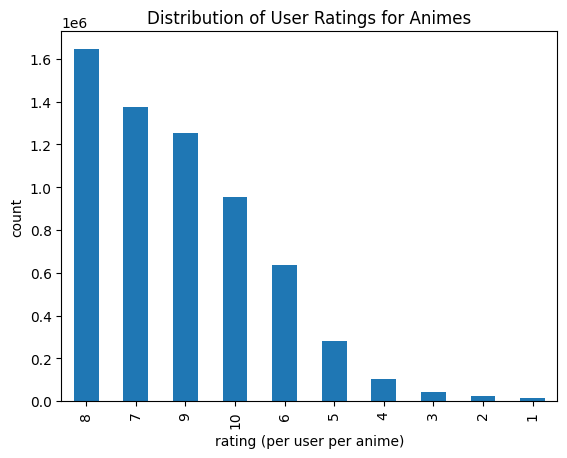

In [13]:
rating_df['rating'].value_counts().plot.bar()
plt.xlabel('rating (per user per anime)')
plt.ylabel('count')
plt.title('Distribution of User Ratings for Animes')

Most users give average of 7-9 rating to animes, both from the perspective of raw distribution count and per user rating average.

### What's the average rating one person give

count    69600.000000
mean         8.227761
std          0.902856
min          1.000000
25%          7.666667
50%          8.193548
75%          8.815789
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per User')

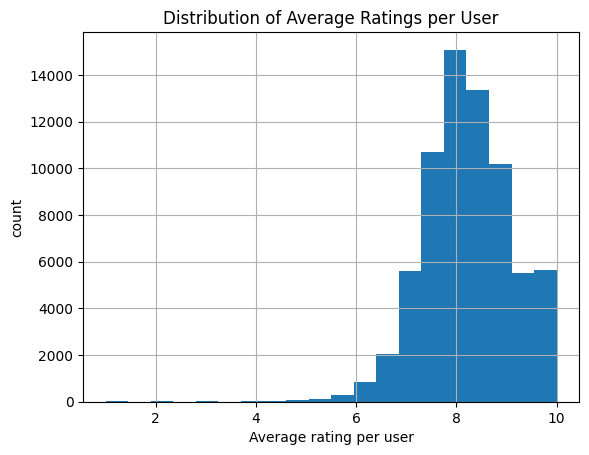

In [15]:
mean_rating_per_user = rating_df.groupby('user_id')['rating'].mean()
print(mean_rating_per_user.describe())

mean_rating_per_user.hist(bins=20)
plt.xlabel('Average rating per user')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per User')

Most people give average ratings between 7-9.

### How many anime does one person rate

count    69600.000000
mean        91.052299
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: anime_id, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per User')

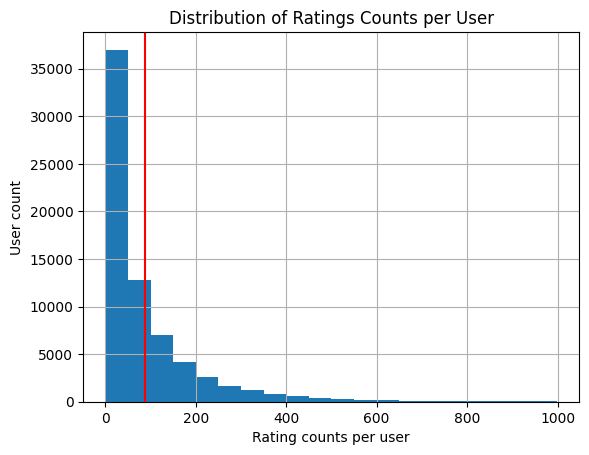

In [16]:
count_per_user = rating_df.groupby('user_id').count()['anime_id']
print(count_per_user.describe())
count_per_user = count_per_user[count_per_user<1000]
count_per_user.hist(bins=20)
plt.axvline(count_per_user.mean(), color='r')
plt.xlabel('Rating counts per user')
plt.ylabel('User count')
plt.title('Distribution of Ratings Counts per User')

We see a wide range of number of ratings a person gives. In average, a user rate 91 animes, and 50% of the users rate 13-114 animes.

### Is there a relationship between user's average rating and user's rating counts

Text(0.5, 1.0, 'Relationship Between User’s Average Rating and Rating Count per User')

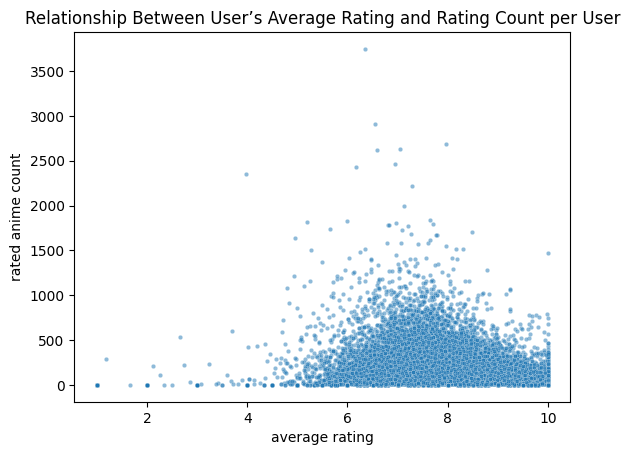

In [17]:
count = rating_df.groupby('user_id').count()
avg_rating = rating_df.groupby('user_id')['rating'].mean()
merged_df = count.merge(avg_rating, on='user_id')
sns.scatterplot(data = merged_df, y='anime_id', x='rating_y', s=10, alpha=0.5)
plt.xlabel('average rating')
plt.ylabel('rated anime count')
plt.title('Relationship Between User’s Average Rating and Rating Count per User')

In [18]:
scipy.stats.pearsonr(merged_df['anime_id'], merged_df['rating_y'])

PearsonRResult(statistic=-0.31144470823219916, pvalue=0.0)

There is a weak negative correlation between the rating and the number of ratings per user. The more anime the user rate, the lower rating they tend to give. 

### What are the rating distirbutions of the animes

count    11869.000000
mean         6.481038
std          1.021649
min          1.670000
25%          5.890000
50%          6.570000
75%          7.190000
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per Anime')

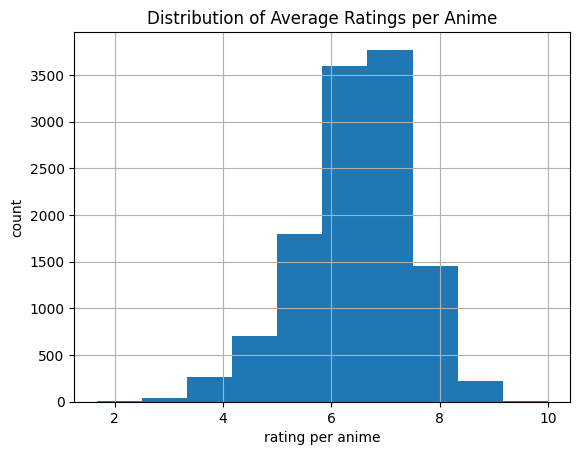

In [20]:
print(anime_df['rating'].describe())
anime_df['rating'].hist()
plt.xlabel('rating per anime')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per Anime')

Animes recieves rating of 6.5 in average, where most of the average rating ranges from 5-7.

### How many rating does each anime get

count     9927.000000
mean       638.384205
std       1795.864158
min          1.000000
25%          9.000000
50%         57.000000
75%        395.000000
max      34226.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime')

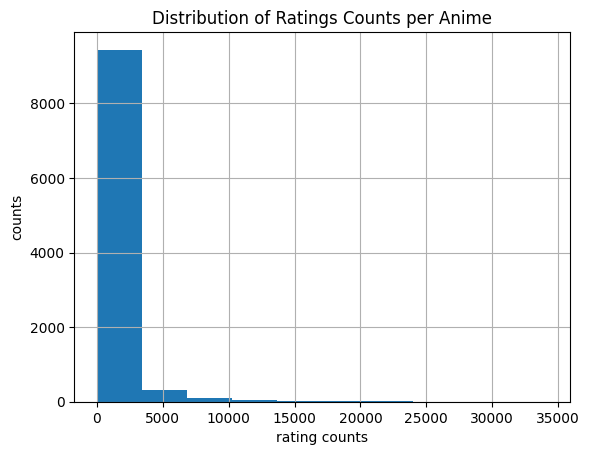

In [21]:
rating_count_per_anime = rating_df.groupby('anime_id').count()['rating']
print(rating_count_per_anime.describe())
rating_count_per_anime.hist()
plt.xlabel('rating counts')
plt.ylabel('counts')
plt.title('Distribution of Ratings Counts per Anime')

There is a wide range for how many rating each anime gets. The average is 638, and 50% of the animes get 9-395 ratings.

Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime (log)')

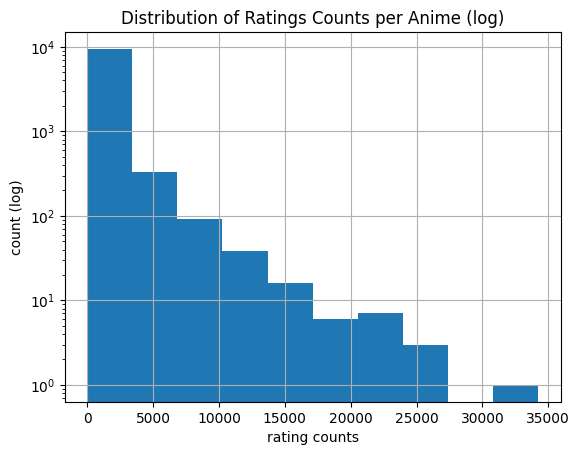

In [22]:
rating_count_per_anime.hist()
plt.yscale('log')
plt.xlabel('rating counts')
plt.ylabel('count (log)')
plt.title('Distribution of Ratings Counts per Anime (log)')

### Is there a relationship between anime's average rating and anime's rating counts

Text(0.5, 1.0, "Relationship Between Anime's Average Rating and Rating Count per Anime")

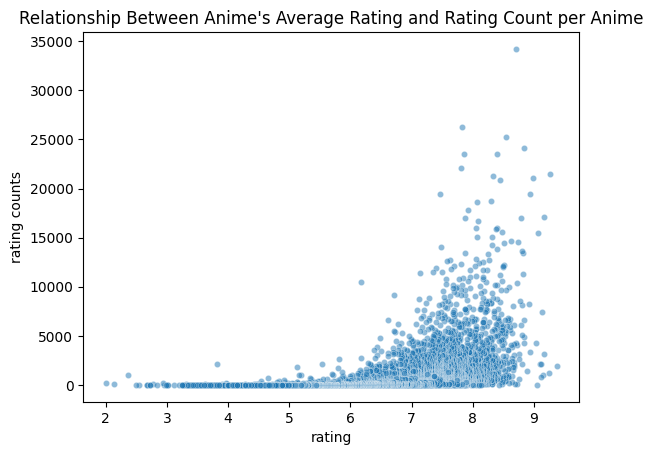

In [23]:
rating_count_per_anime
anime_df_merged = anime_df.merge(rating_count_per_anime, on='anime_id')
sns.scatterplot(data=anime_df_merged, x='rating_x', y='rating_y', s=20, alpha=0.5)
plt.xlabel('rating')
plt.ylabel('rating counts')
plt.title("Relationship Between Anime's Average Rating and Rating Count per Anime")

In [24]:
scipy.stats.pearsonr(anime_df_merged['rating_x'], anime_df_merged['rating_y'])

PearsonRResult(statistic=0.400690112560548, pvalue=0.0)

There is a weak positive correlation between the rating and the number of ratings per anime. The more rating an anime recieves, the higher rating they tend to get. 

### Does anime type affect the rating?

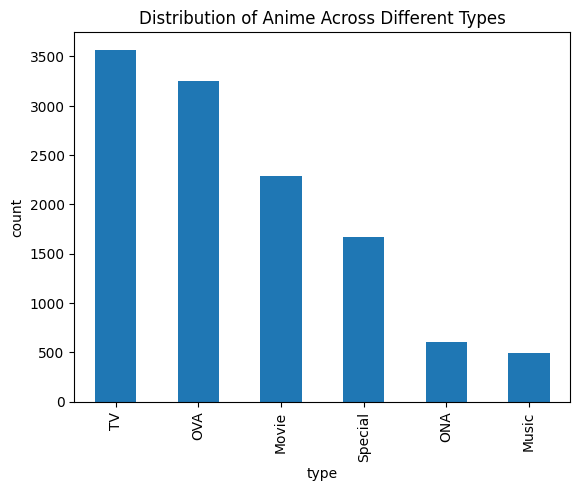

In [25]:
anime_df['type'].value_counts().plot.bar()
plt.xlabel('type')
plt.ylabel('count')
plt.title('Distribution of Anime Across Different Types')
plt.show()

Text(0, 0.5, 'rating')

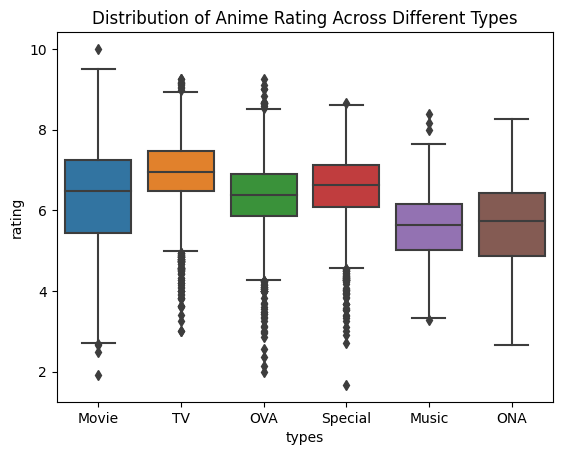

In [26]:
sns.boxplot(x='type', y='rating', data=anime_df)
plt.title('Distribution of Anime Rating Across Different Types')
plt.xlabel('types')
plt.ylabel('rating')

In [27]:
anova_results = pingouin.anova(data=anime_df,
                               dv="rating",
                               between="type")
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,type,5,11863,362.475092,0.0,0.132528


Based on the anova result, the anime type has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the types than with in the types.

### Does anime genre affect the rating?

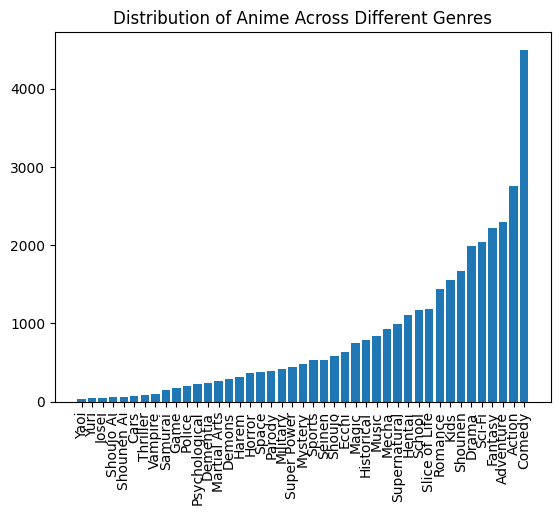

In [28]:
genres = anime_df.drop(columns=['type', 'episodes', 'rating', 'members', 'name'])
sum = genres.sum().sort_values()
plt.bar(x=sum.index, height=sum)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Across Different Genres')
plt.show()

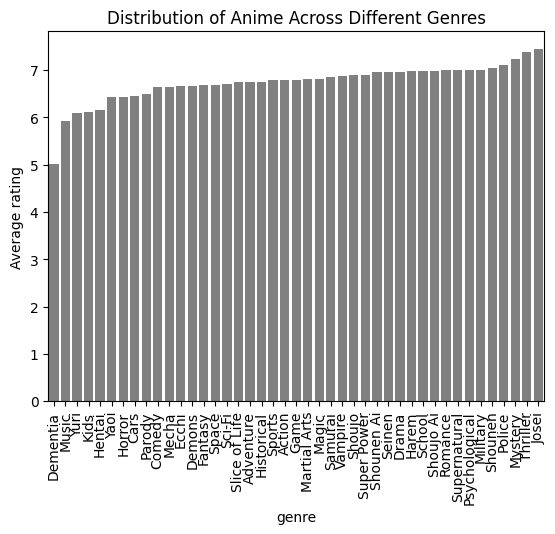

In [29]:
genre_and_rating = anime_df.drop(columns=['type', 'episodes', 'members', 'name'])

genre_avg_rating = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_avg_rating.append(rating.mean())

genre_avg_rating_df = pd.DataFrame({'genre': genres.columns, 'avg_rating': genre_avg_rating}).sort_values(by='avg_rating')

sns.barplot(data=genre_avg_rating_df, x='genre', y='avg_rating', color='grey')
plt.xticks(rotation=90)
plt.ylabel('Average rating')
plt.title('Distribution of Anime Across Different Genres')
plt.show()

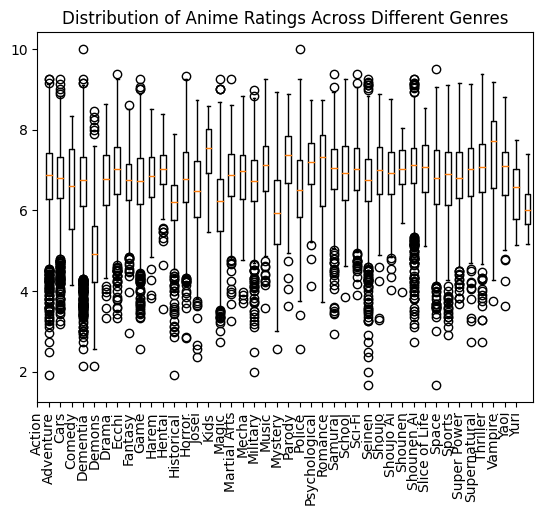

In [30]:
genre_ratings = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_ratings.append(rating)

plt.boxplot(genre_ratings)
plt.xticks(range(len(genres.columns)),genres.columns)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Ratings Across Different Genres')
plt.show()


In [31]:
from statsmodels.formula.api import ols

# Reshape the dataframe for ANOVA
melted_df = genre_and_rating.melt(id_vars=['rating'],value_vars=genres.columns, value_name='is_genre', var_name='genre')
anova_results = pingouin.anova(data=melted_df[melted_df['is_genre'] == 1], dv="rating", between="genre")
anova_results


,Source,ddof1,ddof2,F,p-unc,np2
0,genre,42,35263,90.641355,0.0,0.097439


Based on the anova result, the genre has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the genres than with in the genres.

### Does anime episodes affect the rating?

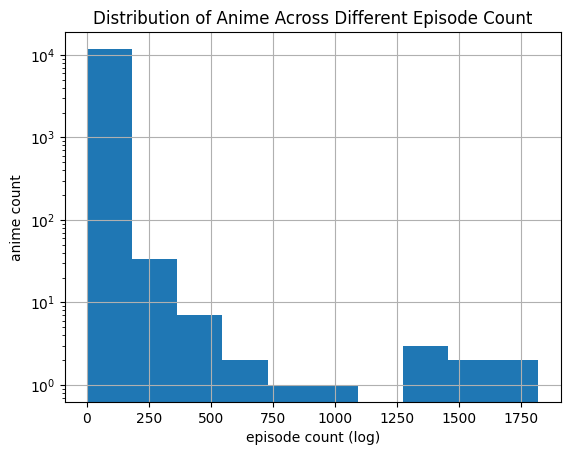

In [32]:
anime_df['episodes'].hist()
plt.yscale('log')
plt.xlabel('episode count (log)')
plt.ylabel('anime count')
plt.title('Distribution of Anime Across Different Episode Count')
plt.show()

Text(0.5, 1.0, 'Relationships between rating and epidoes')

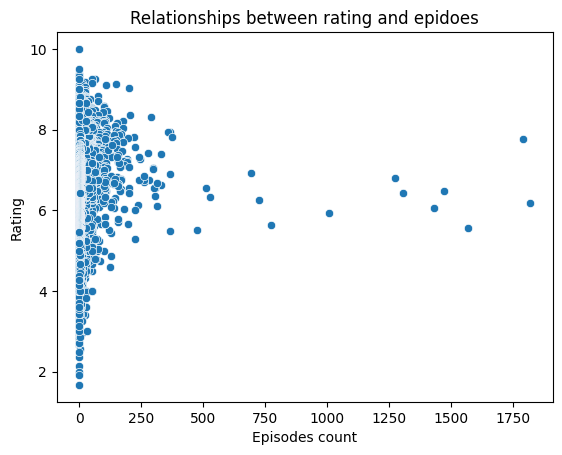

In [33]:
sns.scatterplot(data=anime_df, x='episodes', y='rating')
plt.xlabel('Episodes count')
plt.ylabel('Rating')
plt.title('Relationships between rating and epidoes')

In [34]:
scipy.stats.pearsonr(anime_df['episodes'], anime_df['rating'])

PearsonRResult(statistic=0.0886531364214489, pvalue=3.8004285032201785e-22)

Based on the Person correlation coeffecient value, there is very little positive correlation between rating and episodes.

### Does anime members affect rating

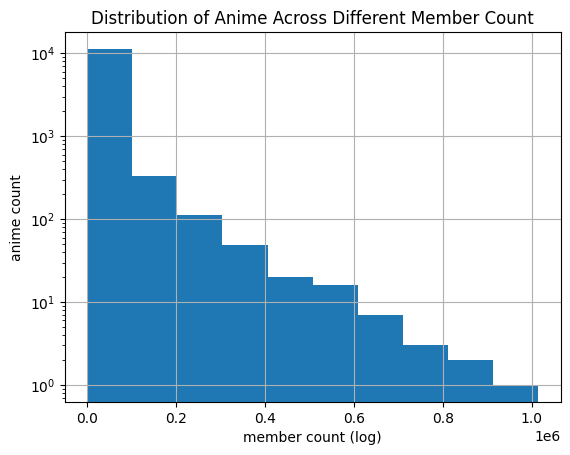

In [35]:
anime_df['members'].hist()
plt.yscale('log')
plt.xlabel('member count (log)')
plt.ylabel('anime count')
plt.title('Distribution of Anime Across Different Member Count')
plt.show()

Text(0.5, 1.0, 'Relationships between rating and members')

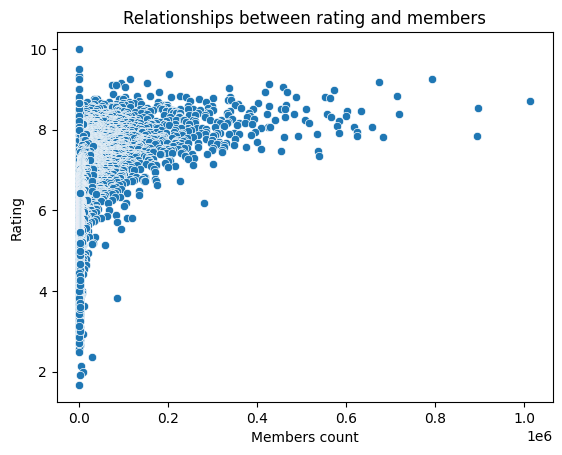

In [36]:
sns.scatterplot(data=anime_df, x='members', y='rating')
plt.xlabel('Members count')
plt.ylabel('Rating')
plt.title('Relationships between rating and members')

In [37]:
scipy.stats.pearsonr(anime_df['episodes'], anime_df['rating'])

PearsonRResult(statistic=0.0886531364214489, pvalue=3.8004285032201785e-22)

Based on the Person correlation coeffecient value, there is very little positive correlation between rating and members.

### Relationships among multiple features

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


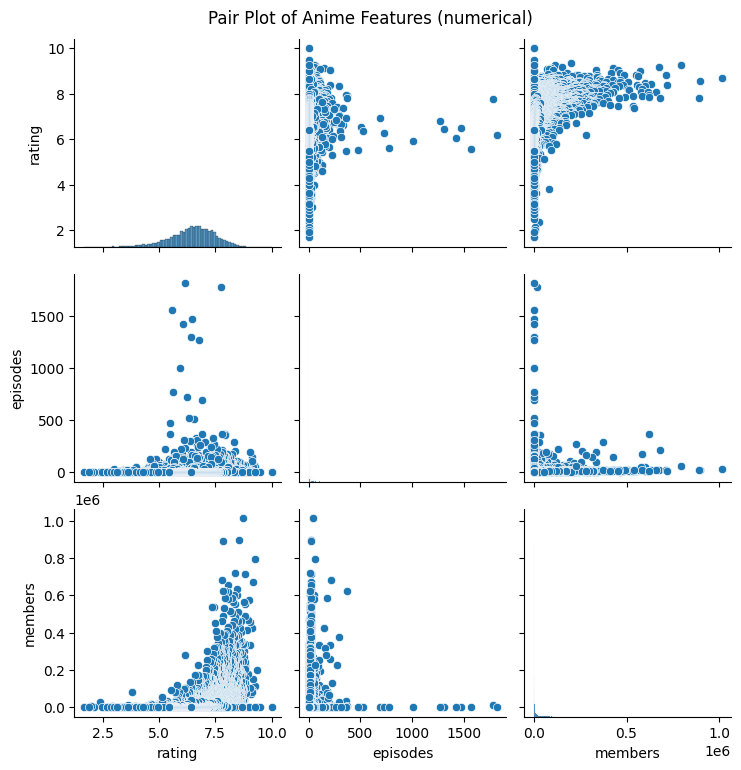

In [42]:
sns.pairplot(anime_df[['rating', 'episodes', 'members']])
plt.suptitle('Pair Plot of Anime Features (numerical)', y=1.02)
plt.show()

### PCA

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [39]:
genre_and_rating = anime_df.drop(columns=['type', 'episodes', 'members', 'name'])
pca = PCA().fit(genre_and_rating)
print(pca.explained_variance_ratio_)
print(pca.get_feature_names_out())

[0.30718255 0.08051813 0.0694722  0.05790534 0.04168469 0.0384924
 0.03256096 0.03152412 0.02707056 0.02538744 0.02432396 0.02203225
 0.02021908 0.01812991 0.0172263  0.01587694 0.01419024 0.01389772
 0.01347407 0.01116936 0.01064696 0.00980817 0.0095695  0.00915313
 0.00859072 0.00795845 0.00746622 0.00624734 0.00583177 0.00568255
 0.00522444 0.0050441  0.00459914 0.00403818 0.00369108 0.00291232
 0.00217827 0.00179765 0.00158059 0.00142007 0.00124888 0.00117936
 0.00093745 0.00085544]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43']


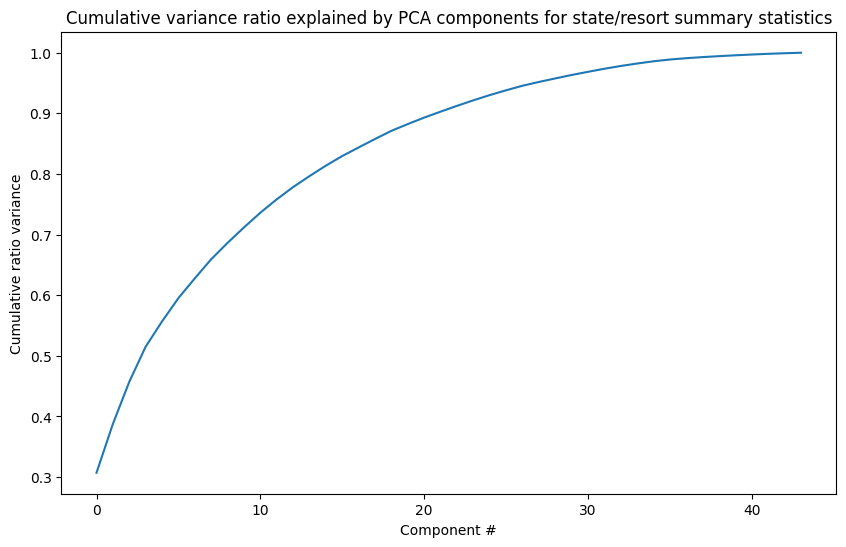

In [403]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

### Summary

Based on the analysis, we see a weak positive correlation between the average rating and the number of ratings per anime. The more rating an anime recieves, the higher rating they tend to recieve.

We also found that anime types and genres has affect on the ratings. There were no specific genres that could capture the data variance well enough.